In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
adf = pd.read_csv('athlete_events.csv')

In [3]:
df = adf[['Height','Weight','Medal']]

In [4]:
df = df.dropna()

In [5]:
gold = df.loc[df['Medal'] == 'Gold']
silver = df.loc[df['Medal'] == 'Silver']
bronze = df.loc[df['Medal'] == 'Bronze']

In [6]:
df['Ratio'] = df.apply(lambda row: row.Height/row.Weight, axis = 1)

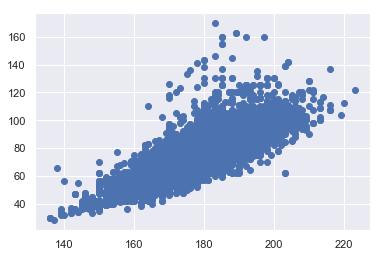

In [7]:
plt.scatter(x = gold['Height'], y = gold['Weight'])

In [8]:
jointDF = pd.concat([gold['Height'],gold['Weight']],axis = 1, join_axes = [gold['Height'].index])
jointDF.corr()

,Height,Weight
Height,1.0000,0.8095
Weight,0.8095,1.0000


The above was the scatterplot for height vs weight for the gold medallists

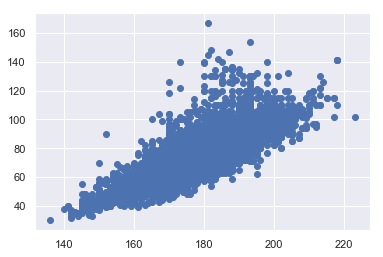

In [9]:
plt.scatter(x = silver['Height'], y = silver['Weight'])

In [10]:
jointDF = pd.concat([silver['Height'],silver['Weight']],axis = 1, join_axes = [silver['Height'].index])
jointDF.corr()

,Height,Weight
Height,1.000000,0.801132
Weight,0.801132,1.000000


The above was the scatterplot for silver medallists

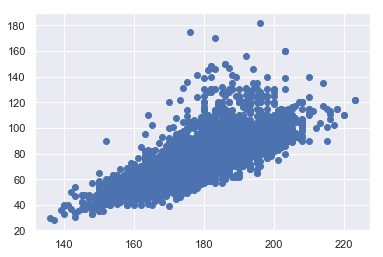

In [11]:
plt.scatter(x = bronze['Height'], y = bronze['Weight'])

In [12]:
jointDF = pd.concat([bronze['Height'],bronze['Weight']],axis = 1, join_axes = [bronze['Height'].index])
jointDF.corr()

,Height,Weight
Height,1.000000,0.794342
Weight,0.794342,1.000000


The above was the scatterplot for height vs weight for bronze medallists

In [13]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 5)

### Let's first carry out a classification based on BMI (cm/kg) and medal obtained

In [14]:
X = pd.DataFrame(df['Ratio'])
y = pd.DataFrame(df['Medal'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

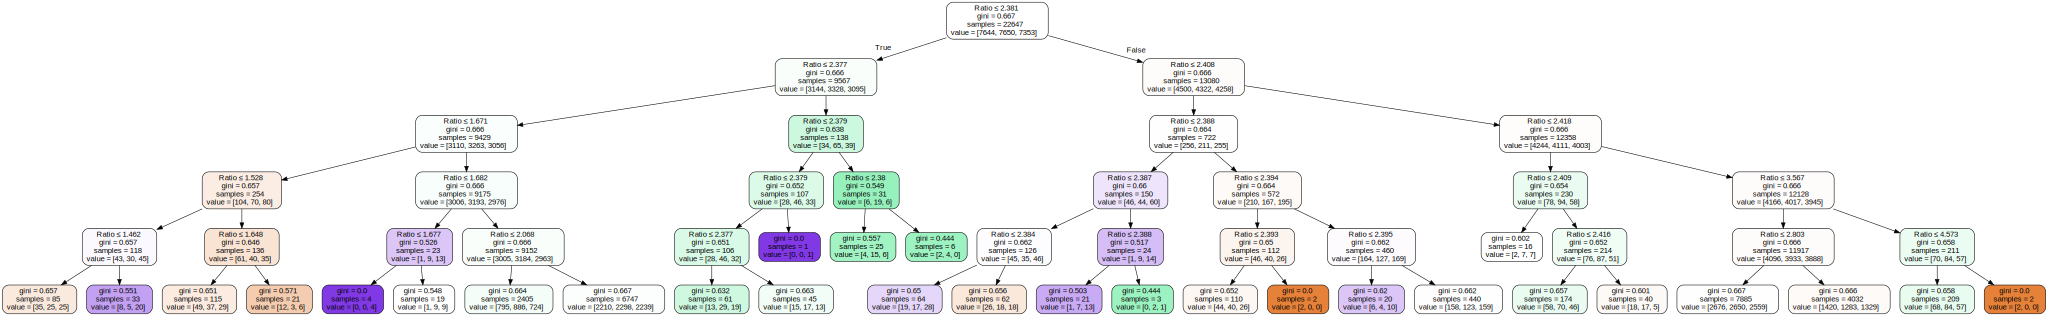

In [15]:
dectree.fit(X_train, y_train)                    # train the decision tree model

from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.35059831324237206

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3424294608557425



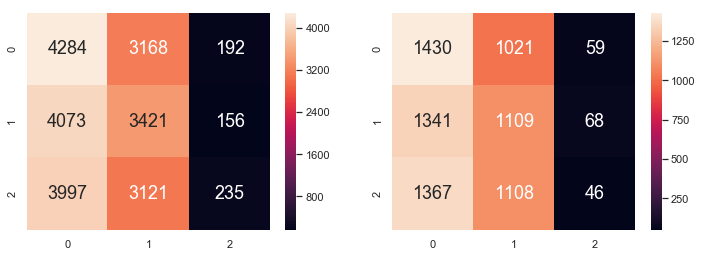

In [16]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Clearly BMI is not a good indicator as people of almost similar BMIs can win any medal.

### Lets classify taking age into consideration, i.e. Multi-variate classification

In [17]:
df['Age'] = adf['Age']
df = df.dropna()
y = pd.DataFrame(df["Medal"])
X = pd.DataFrame(df[["Height", "Weight", "Age"]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

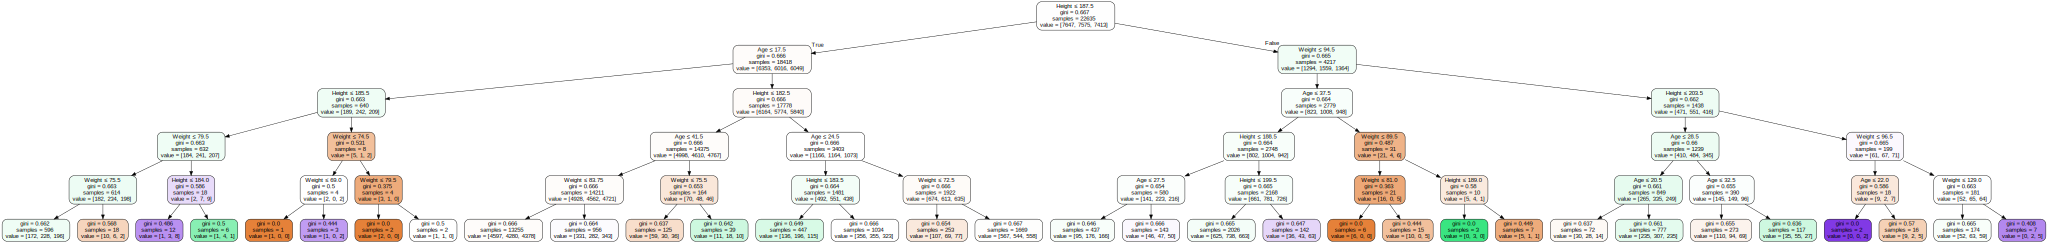

In [19]:
dectree = DecisionTreeClassifier(max_depth = 5)  
dectree.fit(X_train, y_train)                    

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3592224431190634

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.34150543334216804



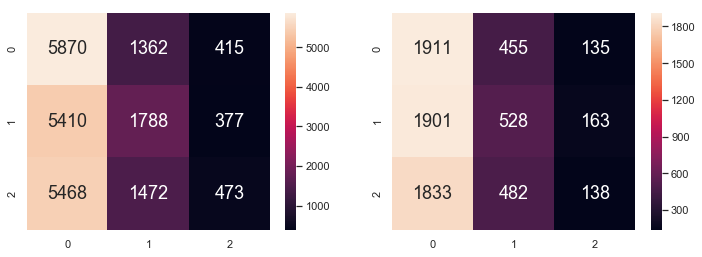

In [20]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Even after factoring in the Age, classification accuracy is not at all high, showing that the three main factors, which should have affected the outcome does not have much of an effect in differentiating amongst the 'winners'.

## Lets now carry out a clustering of the dataset and see if we can find out any meaningful division of clusters

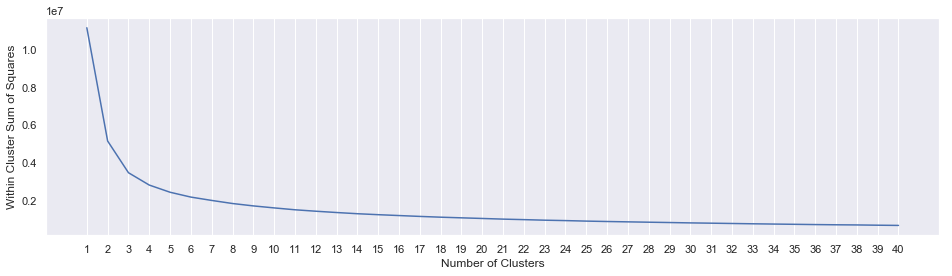

In [21]:
from sklearn.cluster import KMeans
X = pd.DataFrame(df[["Height", "Weight", "Age"]])

min_clust = 1
max_clust = 40
init_algo = 'k-means++'

within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [22]:
num_clust = 6
init_algo = 'k-means++'

kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Features 	Height 	Weight

Cluster 0:	184.14	81.91	25.6	
Cluster 1:	159.87	51.91	23.51	
Cluster 2:	177.43	71.92	25.95	
Cluster 3:	192.51	94.45	26.38	
Cluster 4:	194.01	120.23	26.92	
Cluster 5:	169.79	62.05	24.88	

Within Cluster Sum of Squares : 2183403.3865116076



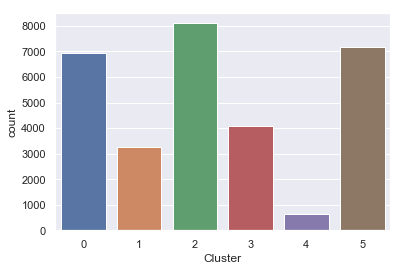

In [23]:
print("Features", "\tHeight", "\tWeight")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(X_labeled["Cluster"])

C:\Users\bhati\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


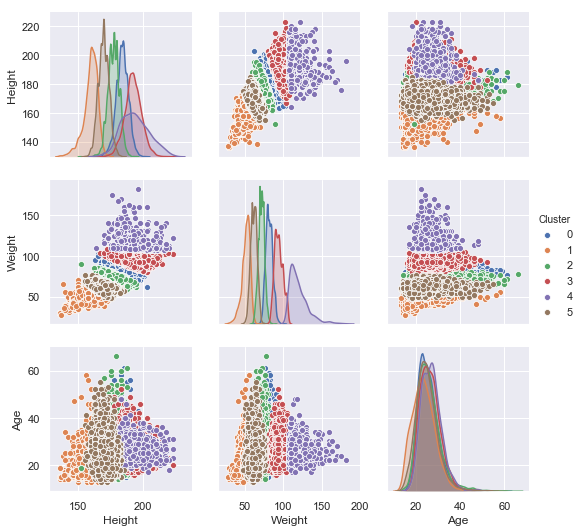

In [24]:
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

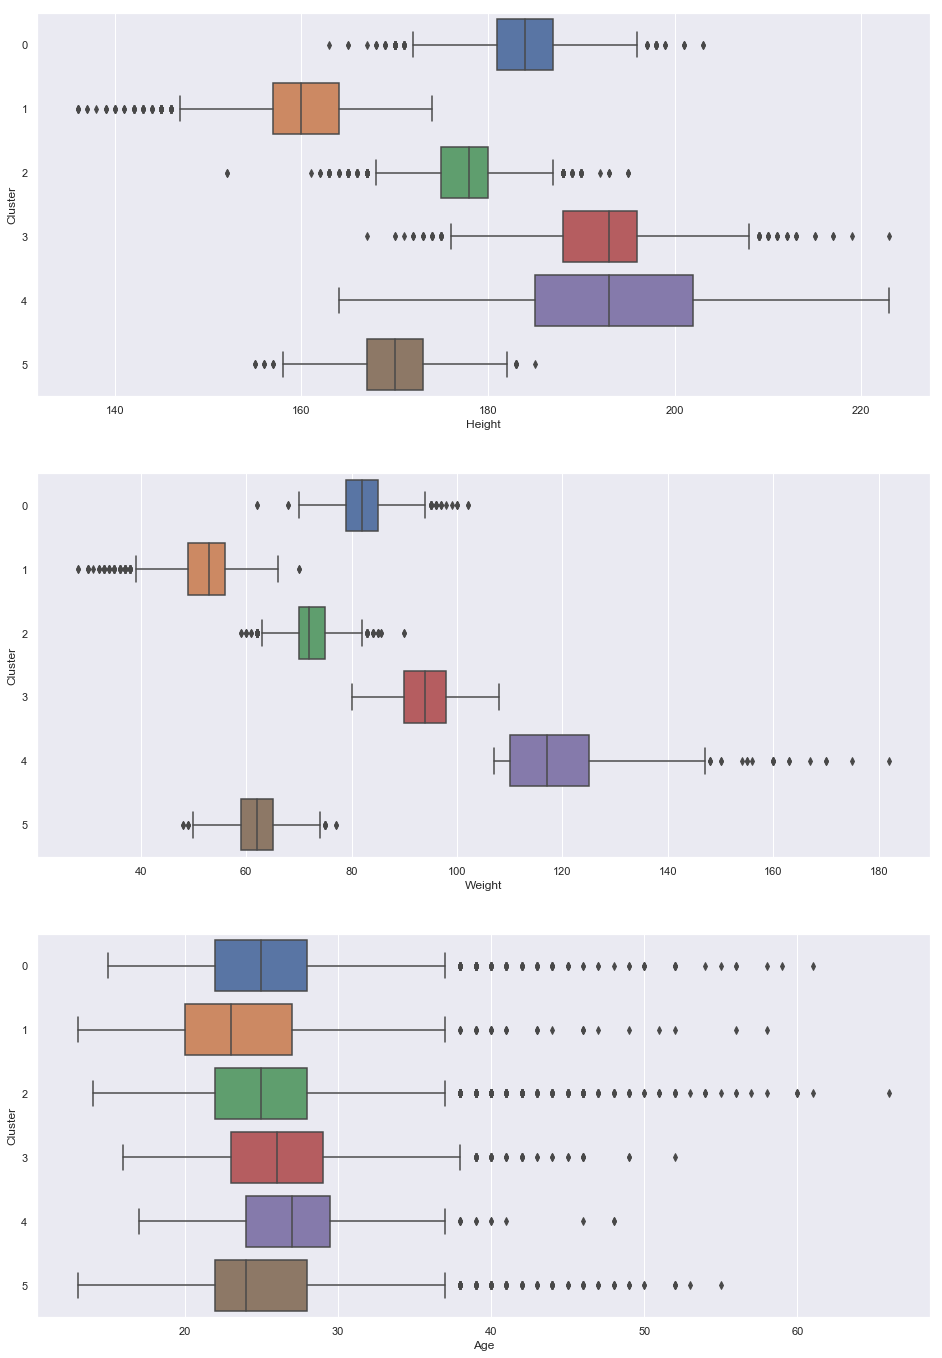

In [25]:
f, axes = plt.subplots(3, 1, figsize=(16,24))
sb.boxplot(x = 'Height', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Weight', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Age', y = 'Cluster', data = X_labeled, ax = axes[2])

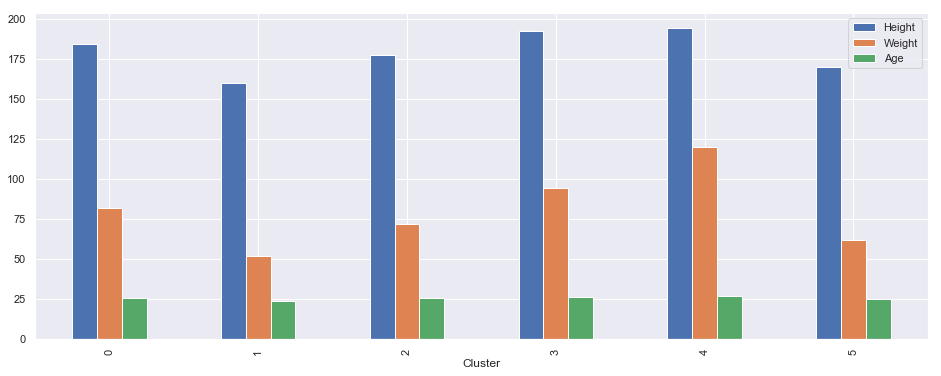

In [26]:
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

The above gives us the mean height, weight and age in each of the six optimal clusters we have decided to make, which also gives meaningful insight into the corresponding average values for the medallists.

### It is extremely interesting to know that anomalies in such a dataset i.e. who are the people who won the medals but did not follow the norm of the average height or weight for their corresponding categories?

# Predicting Anomalies

In [27]:
X = pd.DataFrame(df[["Height", "Weight", "Age"]])

In [28]:
from sklearn.neighbors import LocalOutlierFactor

num_neighbors = 20  
cont_fraction = 0.05    

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

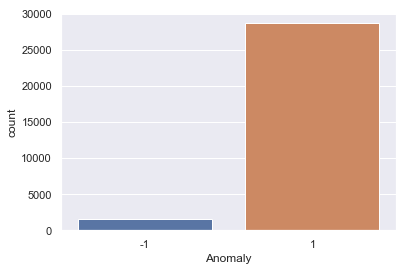

In [29]:
labels = lof.fit_predict(X)

X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

#Summary of anomaly labels
sb.countplot(X_labeled["Anomaly"])

C:\Users\bhati\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


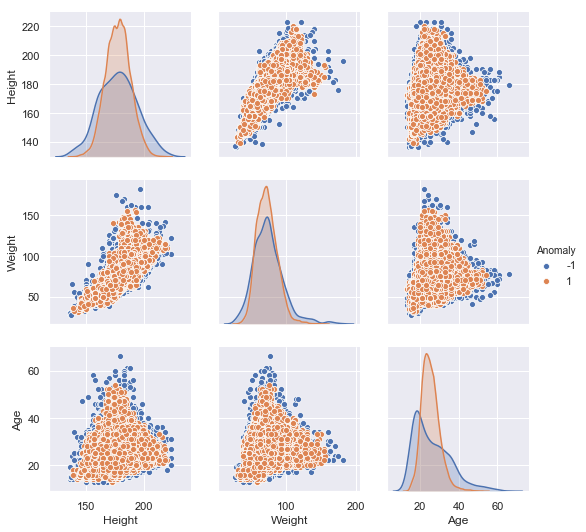

In [30]:
#See Anomalies in the data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

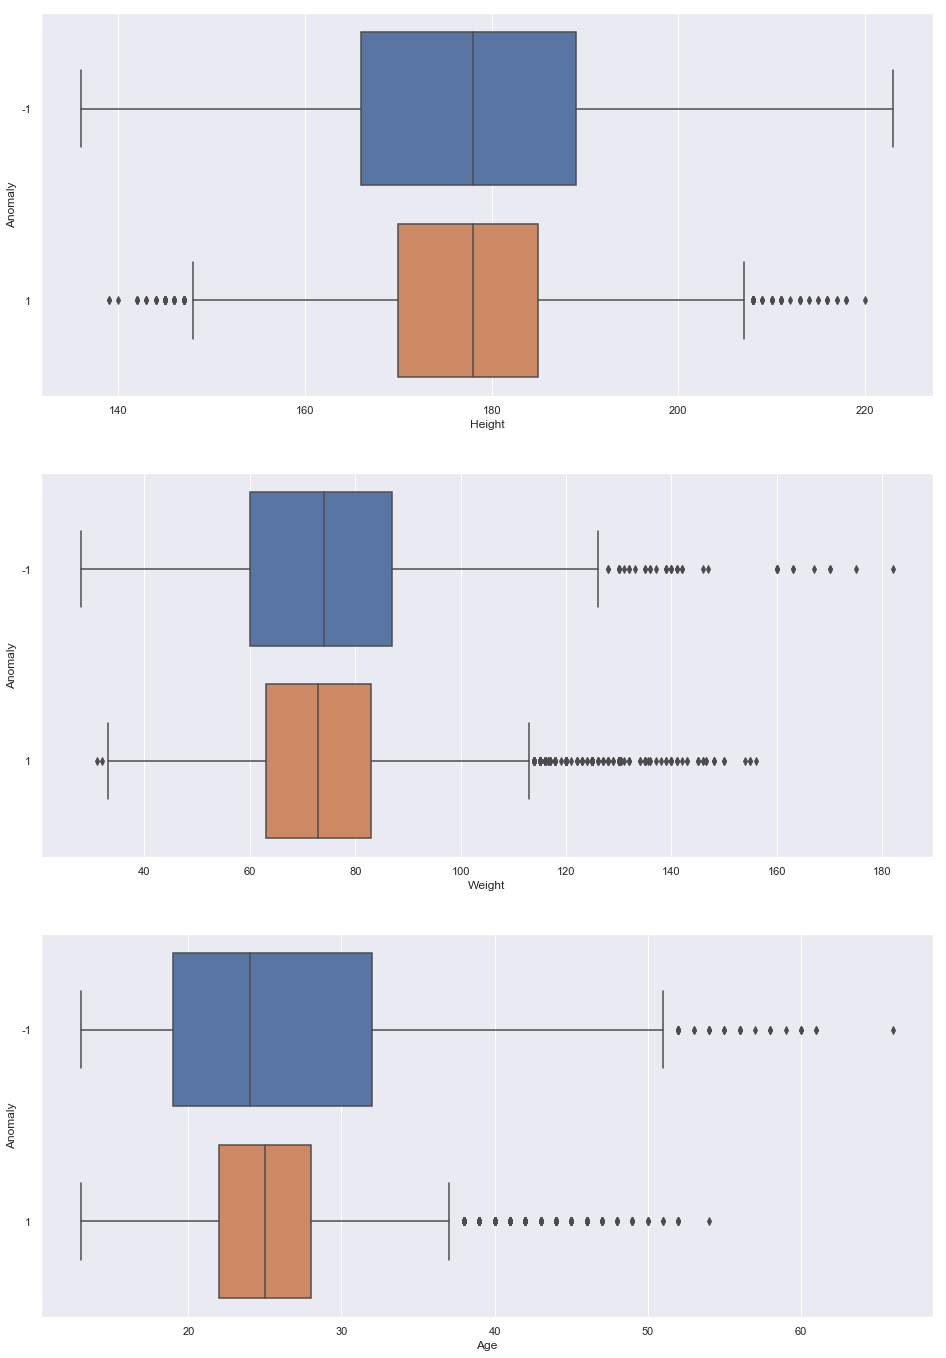

In [31]:
f, axes = plt.subplots(3, 1, figsize=(16,24))
sb.boxplot(x = 'Height', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Weight', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Age', y = 'Anomaly', data = X_labeled, ax = axes[2])

From the above pairplot and boxplots, it is clear what the anomalies are and what are the corresponding values. There certain people who are quite old and still won a medal, while some were extremely short and were still successful in beating their competitiors.

# PREDICTION OF THE MEDAL YOU MAY OBTAIN

In [32]:
#fresh declaration of datasets

In [33]:
#we have to consider possibility of the user not winning any medals, so use fillna
df = adf[['Height','Weight','Age','Medal']]
df['Medal'] = df['Medal'].fillna('None')      #to convert NA to zero, the ones who didn't win a medal
df = df.dropna()

C:\Users\bhati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df['Ratio'] = df.apply(lambda row: row.Height/row.Weight, axis = 1)
y = pd.DataFrame(df["Medal"])
X = pd.DataFrame(df[["Height", "Weight", "Age", "Ratio"]])

In [35]:
height = (float)(input("Enter your height (in cm): "))

Enter your height (in cm): 175


In [36]:
weight = (float)(input("Enter your weight (in kg): "))

Enter your weight (in kg): 72


In [37]:
bmi = height/weight

In [38]:
age = (int)(input("Enter your age: "))

Enter your age: 24


In [39]:
print("These are your features:")
print("Height =",height)
print("Weight =",weight)
print("Body Mass Index (cm/kg) (Ratio) =",bmi)
print("Age =",age)
print("Use the above features to traverse down the decision tree made below to determine the medal (with a certain probability) that you have chances of winning in the Olympics!")

These are your features:
Height = 175.0
Weight = 72.0
Body Mass Index (cm/kg) (Ratio) = 2.4305555555555554
Age = 24
Use the above features to traverse down the decision tree made below to determine the medal (with a certain probability) that you have chances of winning in the Olympics!


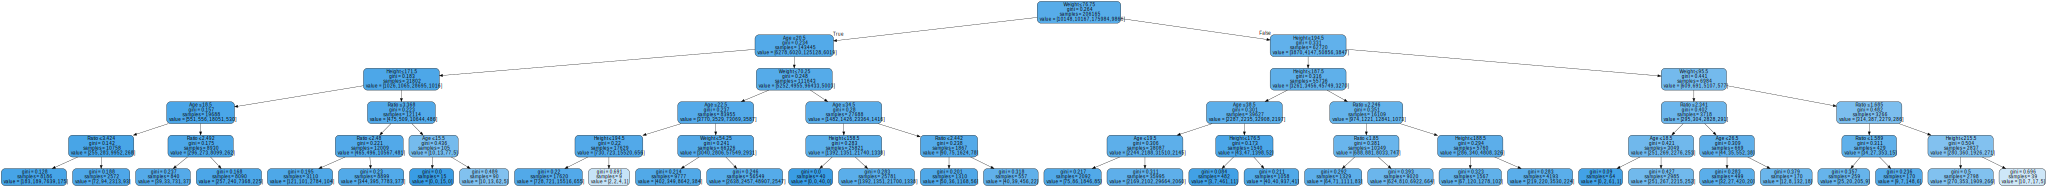

In [40]:
from sklearn.tree import DecisionTreeClassifier
#Train Decision Tree using entire data
dectree = DecisionTreeClassifier(max_depth = 5)  
dectree.fit(X, y)                   

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X.columns,                    # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

In the above scenario, we land with a 100% chance of one winning a bronze model in the olympics! But this is only by luck as there are many nodes where the gini is relatively high which decreases the accuracy of prediction.

### Prediction accuracy will be better if we implement a random forest of trees to do the prediction

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
y = np.ravel(pd.DataFrame(df["Medal"]))                                         #convert column vector to 1D array
X = pd.DataFrame(df[["Height", "Weight", "Age", "Ratio"]])
clf = RandomForestClassifier(n_estimators=100, max_depth=2, 
                             random_state=0)
clf.fit(X, y)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print('The importance of features [height,weight,age,bmi]:',clf.feature_importances_)
print('The medal that you are likely to win:',clf.predict([[height, weight, age, bmi]]))

The importance of features [height,weight,age,bmi]: [0.239244   0.45682858 0.08024437 0.22368305]
The medal that you are likely to win: ['None']


The above results show that for the input values, the player is not likely to win any medal.

# Let's implement a 'Forest of Trees': to decide the importance of features in predicting the medal obtained.

The following are the features:
Feature 0: Height
Feature 1: Weight
Feature 2: Age
Feature 3: Sex

Importance of feature ranking:
1. feature 1 (0.402770)
2. feature 0 (0.305286)
3. feature 2 (0.290311)
4. feature 3 (0.001634)


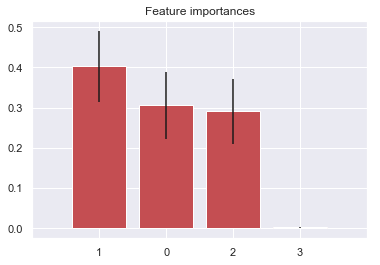

In [42]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

df = adf[['Height','Weight','Age','Sex','Medal']]
df = df.dropna()
df['Medal'] = df['Medal'].fillna('None')
df['Medal'] = df['Medal'].map({'Gold':1,'Silver':2,'Bronze':3,'None':0})
df['Sex'] = df['Sex'].map({'M':1,'F':2})
X = df[['Height','Weight','Age','Sex']]
y = df['Medal']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print('The following are the features:')
print('Feature 0: Height')
print('Feature 1: Weight')
print('Feature 2: Age')
print('Feature 3: Sex')
print()

# Print the feature ranking
print("Importance of feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### As visible above, the most important feature in predciting the medal is the weight, followed by the height and then the age. The Sex does not matter as expected, and hence has a close to zero effect.

This can also be confirmed by drawing a heatmap

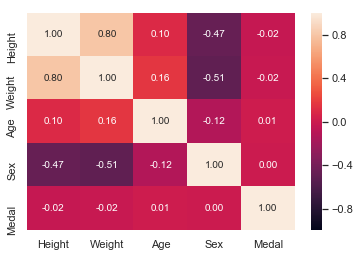

In [43]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Both height and weight are one of the best variables to predict the medal obtained.